# Limits-cf-configs

Ok, so we tried varying a lot of the knobs, but surely there are some commonalities that can help us dissect this!!

In [1]:
import pyhf

import os
os.sys.path+= ['../RRevolution/code/','../code/']
from analysis import getXhh
from utils import mcToYr

import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot

import matplotlib.pyplot as plt
from matplotlib import gridspec

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


**Step 1:** SM limits

In [2]:
labels = [
    # min(dR)
    'min_dR',
    'min_dR_VEC',
    'min_dR_VEC_2b1jFucked',
    # pag: Db
    'pag_Db_2b1jFucked',
    'pag_Db_VEC',
    # pag: b-tag
    'pag_btag_VEC'
]

In [3]:
df = pd.DataFrame(0,index=labels+[f'sr-125.0_116.0_1.6-{l}' for l in labels],
                  columns=['stat','sys'])

In [4]:
subDir = 'pairings_HC_sorts'
out_dir = f'../stats-results/{subDir}'

In [5]:
df.index

Index(['min_dR', 'min_dR_VEC', 'min_dR_VEC_2b1jFucked', 'pag_Db_2b1jFucked',
       'pag_Db_VEC', 'pag_btag_VEC', 'sr-125.0_116.0_1.6-min_dR',
       'sr-125.0_116.0_1.6-min_dR_VEC',
       'sr-125.0_116.0_1.6-min_dR_VEC_2b1jFucked',
       'sr-125.0_116.0_1.6-pag_Db_2b1jFucked', 'sr-125.0_116.0_1.6-pag_Db_VEC',
       'sr-125.0_116.0_1.6-pag_btag_VEC'],
      dtype='object')

In [6]:
(['ntag']*3+['ntag_pag']*3)*2

['ntag',
 'ntag',
 'ntag',
 'ntag_pag',
 'ntag_pag',
 'ntag_pag',
 'ntag',
 'ntag',
 'ntag',
 'ntag_pag',
 'ntag_pag',
 'ntag_pag']

In [7]:
os.chdir('../non-resonant-studies/')

for l, tag_str in zip(df.index,(['ntag']*3+['ntag_pag']*3)*2):
    
    for c in df.columns:
        
        ts = f'-{tag_str}' if tag_str != 'ntag' else ''
        s = 'systs-HTcut-300' if c == 'sys' else 'stat-only'
        
        config = f'{s}-4b{ts}-17-SM-HH-{l}'
        
        dfi = pd.read_csv(f'{out_dir}/lim-{config}.csv')
#         print(dfi)
        df.loc[l,c] = dfi.loc[0,'Exp']
        
        
    # For the systs configs, - also get the pull, impact, and correlation plots
    ws_file = f'{out_dir}/ws-{config}.json'
    if not os.path.exists(ws_file.replace('.json','_correlations.csv')):
        cmd = f'python run_pulls.py -i {ws_file} --pulls --impacts --correlations'
        os.system(cmd)
    
os.chdir('../PAG-opt/')
df['% degradation'] = (df['sys']/df['stat'] - 1)*100

In [8]:
df

stat     sys  % degradation
min_dR                                    13.622  21.964      61.239172
min_dR_VEC                                12.054  13.934      15.596482
min_dR_VEC_2b1jFucked                     12.618  15.204      20.494532
pag_Db_2b1jFucked                         12.636  25.599     102.587844
pag_Db_VEC                                12.881  25.515      98.082447
pag_btag_VEC                              12.703  24.956      96.457530
sr-125.0_116.0_1.6-min_dR                 12.323  19.508      58.305607
sr-125.0_116.0_1.6-min_dR_VEC             11.015  12.772      15.950976
sr-125.0_116.0_1.6-min_dR_VEC_2b1jFucked  11.500  14.117      22.756522
sr-125.0_116.0_1.6-pag_Db_2b1jFucked      11.473  23.370     103.695633
sr-125.0_116.0_1.6-pag_Db_VEC             12.110  20.752      71.362510
sr-125.0_116.0_1.6-pag_btag_VEC           11.983  20.428      70.474839

In [9]:
df.loc[labels]

stat     sys  % degradation
min_dR                 13.622  21.964      61.239172
min_dR_VEC             12.054  13.934      15.596482
min_dR_VEC_2b1jFucked  12.618  15.204      20.494532
pag_Db_2b1jFucked      12.636  25.599     102.587844
pag_Db_VEC             12.881  25.515      98.082447
pag_btag_VEC           12.703  24.956      96.457530

Sean's $\min \Delta R$ results from [11th Feb](https://indico.cern.ch/event/1007636/contributions/4230278/attachments/2188882/3699022/min%28dR%29%20Baselines.pdf):

|  sort  | Stat | Sys  |
| ------ | ---- | ---- |
| scalar | 13.4 | 21.2 |
| vector | 12.7 | 14.6 |


Aside, could it be b/c it's also important to include the `dRjj_{1,2}_HC` variables to get reasonable results with the pag reweighting.

In [55]:
sys_16 = np.array([23.9, 31.0, 21.4, 25.2])

sys_17 = np.array([13.8, 20.5, 14.2, 15.8])

sys_18 = np.array([13.7, 15.7, 13.4, 12.8])

In [54]:
(sys_16/19.0-1)*100

array([25.78947368, 63.15789474, 12.63157895, 32.63157895])

In [52]:
(sys_17/13.6-1)*100

array([ 1.47058824, 50.73529412,  4.41176471, 16.17647059])

In [56]:
(sys_18/11.9-1)*100

array([15.12605042, 31.93277311, 12.60504202,  7.56302521])

**One other caveat:** Could `ntag_pag` have made the limits *worse* than `ntag`??

In [60]:
os.chdir('../non-resonant-studies/')

for l in labels[3:] + [f'sr-125.0_116.0_1.6-{l}' for l in labels[3:]]:
    
    for c in df.columns:
        
        s = 'systs-HTcut-300' if c == 'sys' else 'stat-only'
        
        config = f'{s}-4b-17-SM-HH-{l}'
        
        dfi = pd.read_csv(f'{out_dir}/lim-{config}.csv')
#         print(dfi)
        df.loc[l+'_ntag',c] = dfi.loc[0,'Exp']
        
        
    # For the systs configs, - also get the pull, impact, and correlation plots
    ws_file = f'{out_dir}/ws-{config}.json'
    if not os.path.exists(ws_file.replace('.json','_correlations.csv')):
        cmd = f'python run_pulls.py -i {ws_file} --pulls --impacts --correlations'
        os.system(cmd)
    
os.chdir('../PAG-opt/')       
df['% degradation'] = (df['sys']/df['stat'] - 1)*100

In [61]:
df.round(2)

stat    sys  % degradation
min_dR                                     13.62  21.96          61.24
min_dR_VEC                                 12.05  13.93          15.60
min_dR_VEC_2b1jFucked                      12.62  15.20          20.49
pag_Db_2b1jFucked                          12.64  25.60         102.59
pag_Db_VEC                                 12.88  25.52          98.08
pag_btag_VEC                               12.70  24.96          96.46
sr-125.0_116.0_1.6-min_dR                  12.32  19.51          58.31
sr-125.0_116.0_1.6-min_dR_VEC              11.02  12.77          15.95
sr-125.0_116.0_1.6-min_dR_VEC_2b1jFucked   11.50  14.12          22.76
sr-125.0_116.0_1.6-pag_Db_2b1jFucked       11.47  23.37         103.70
sr-125.0_116.0_1.6-pag_Db_VEC              12.11  20.75          71.36
sr-125.0_116.0_1.6-pag_btag_VEC            11.98  20.43          70.47
pag_Db_2b1jFucked_ntag                     12.29  24.68         100.87
pag_Db_VEC_ntag                            12.52  24.54          95.97
pag_btag_VEC_ntag                          12.56  24.35          93.91
sr-125.0_116.0_1.6-pag_Db_2b1jFucked_ntag  11.16  22.48         101.33
sr-125.0_116.0_1.6-pag_Db_VEC_ntag         11.36  21.55          89.62
sr-125.0_116.0_1.6-pag_btag_VEC_ntag       11.39  21.34          87.26

Ok,so the conclusion from **this study** is that I think the pairAGraph files:
1. Need to be trained with additional variables to make these comparisons useful
2. Might have gotten *worse* with the extra signal efficiency at low $m_{hh}$.

**So let's go with Sean's suggestion of just doing the study with the `min_dR_VEC` baseline Ntuples!!**

In [2]:
subDir = 'min_dR_sr_opt'
out_dir = f'../stats-results/{subDir}'

In [3]:
Xhhs = np.arange(1, 2.5, 0.1)

SR_xs = [120, 125, 124]
SR_ys = [110, 116,117]

cols = [f'{s}-{float(xi)}_{float(yi)}' for s in ['stat','sys'] for xi,yi in zip(SR_xs, SR_ys)]
cols


['stat-120.0_110.0',
 'stat-125.0_116.0',
 'stat-124.0_117.0',
 'sys-120.0_110.0',
 'sys-125.0_116.0',
 'sys-124.0_117.0']

In [4]:
min_dR = pd.DataFrame(0, index=Xhhs, columns=cols)

In [5]:
os.chdir('../non-resonant-studies/')

ws_files = []

for c in min_dR.columns:

    for Xhh in Xhhs:
    
        s = 'systs-HTcut-300' if ('sys' in c) else 'stat-only'
        
        l = c.split('-')[1]
        config = f'{s}-4b-17-SM-HH-sr-{l}_{Xhh}'
        
        dfi = pd.read_csv(f'{out_dir}/lim-{config}.csv')
        #print(dfi)
        min_dR.loc[Xhh,c] = dfi.loc[0,'Exp']
        

#         if (abs(Xhh - 1.6)< 1e-5) and 'syst' in s:
#             # For the systs configs, - also get the pull, impact, and correlation plots
#             ws_file = f'{out_dir}/ws-{config}.json'
#             print('Running pulls + impacts')
#             if not os.path.exists(ws_file.replace('.json','_correlations.csv')):
#                 cmd = f'python run_pulls.py -i {ws_file} --pulls --impacts --correlations'
#             os.system(cmd)
    
#             ws_files.append(ws_file)
            
os.chdir('../PAG-opt/')       

In [6]:
figDir = 'figures/min_dR_sr_opt_17'

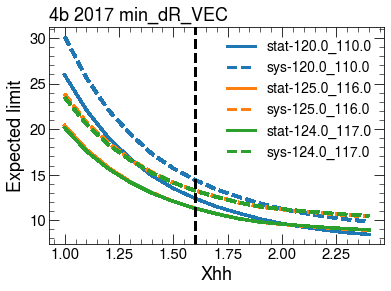

In [44]:
for i, xi, yi in zip(range(3),SR_xs,SR_ys):

    for s, ls in zip(['stat','sys'],['-','--']):
        
        c = f'{s}-{float(xi)}_{float(yi)}'
        plt.plot(Xhhs,min_dR[c],color=f'C{i}',label=c,ls=ls)
    
plt.xlabel('Xhh',fontsize=18)
plt.ylabel('Expected limit',fontsize=18)
plt.legend()

ylim = plt.ylim()
plt.plot([1.6]*2,ylim,'k--')
plt.ylim(ylim)
plt.title('4b 2017 min_dR_VEC',loc='left')
plt.savefig(f'{figDir}/exp_lim_Xhh.pdf',bbox_inches='tight')
plt.show()

**Take aways:** This is *not* a big improvement lol.

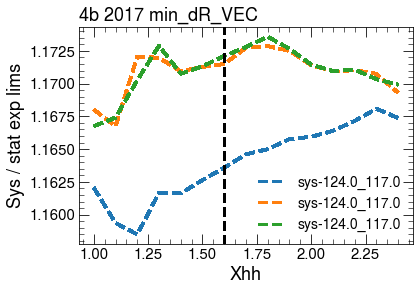

In [8]:
for i, xi, yi in zip(range(3),SR_xs,SR_ys):
        
    stat = min_dR[f'stat-{float(xi)}_{float(yi)}']
    sys  = min_dR[f'sys-{float(xi)}_{float(yi)}']
    plt.plot(Xhhs,sys/stat,color=f'C{i}',label=c,ls='--')
    
plt.xlabel('Xhh',fontsize=18)
plt.ylabel('Sys / stat exp lims',fontsize=18)
plt.legend()

ylim = plt.ylim()
plt.plot([1.6]*2,ylim,'k--')
plt.ylim(ylim)
plt.title('4b 2017 min_dR_VEC',loc='left')

plt.savefig(f'{figDir}/sys_by_stat_exp_lim_Xhh.pdf',bbox_inches='tight')
plt.show()

Good news: The % degradation is $\approx$ stable rn :D

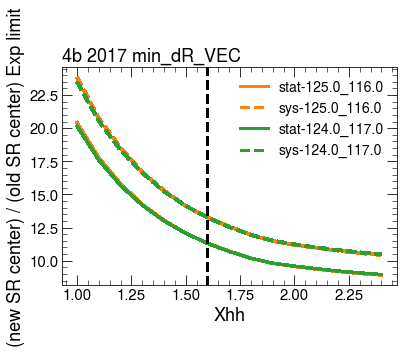

In [9]:
c0 = f'120.0_110.0'

stat0 = f'stat-{c0}'
sys0  = f'sys-{c0}'

for i, xi, yi in zip([1,2],SR_xs[1:],SR_ys[1:]):

    for s, s0, ls in zip(['stat','sys'],[stat0,sys0],['-','--']):
        
        c = f'{s}-{float(xi)}_{float(yi)}'
        plt.plot(Xhhs,min_dR[c],color=f'C{i}',label=c,ls=ls)
    
plt.xlabel('Xhh',fontsize=18)
plt.ylabel('(new SR center) / (old SR center) Exp limit',fontsize=18)
plt.legend()

ylim = plt.ylim()
plt.plot([1.6]*2,ylim,'k--')
plt.ylim(ylim)
plt.title('4b 2017 min_dR_VEC',loc='left')

plt.savefig(f'{figDir}/baseline_cf_exp_lim_Xhh.pdf',bbox_inches='tight')

plt.show()

Yeyyyyyy!!! This is a *sizable* improvement rn :D

**Cool:** Next step, let's try to look at some *intuition building* plots.

**Step 1:** Correlation plots

In [136]:
def plotCorrelation(corr_file,figDir='',tag=''):
    '''
    '''
    
    # Step 1: Load in the correlation file
    C = pd.read_csv(corr_file)

    C.index = C['Unnamed: 0']
    C.index.name = ''
    del C['Unnamed: 0']
    
    
    # Step 2: Draw the plot
    plt.figure(figsize=(7.5,7.5))

    plt.imshow(C.values,cmap='RdBu_r',vmin=-1,vmax=1)

    plt.colorbar()

    l = C.columns

    plt.xticks(range(len(l)),labels=l,rotation=75)
    plt.yticks(range(len(l)),labels=l)

    
    # Step 3: Overlay the #s
    ax = plt.gca()
    for i, xi in enumerate(l):
        for j, yi in enumerate(l):
            cij = C.loc[xi,yi]

            plt.text(i,j,f'{cij:.3f}',ha='center',va='center')

    xi, yi, Xhh = [float(v) for v in corr_file.split('-')[-1].split('_')[:3]]
    plt.title(f'4b 2017, SR center ({xi:.0f},{yi:.0f}), Xhh < {Xhh:.1f}',loc='left')
    ax.tick_params(which='minor', length=0)
    
    # Step 4: Save
    if figDir:
        plt.savefig(f'{figDir}/correlations_4b_{xi:.0f}_{yi:.0f}_{Xhh:1.1f}.pdf',bbox_inches='tight')

../stats-results/min_dR_sr_opt/ws-systs-HTcut-300-4b-17-SM-HH-sr-124.0_117.0_2.4000000000000012_correlations.csv
../stats-results/min_dR_sr_opt/ws-systs-HTcut-300-4b-17-SM-HH-sr-120.0_110.0_2.4000000000000012_correlations.csv
../stats-results/min_dR_sr_opt/ws-systs-HTcut-300-4b-17-SM-HH-sr-125.0_116.0_1.6000000000000005_correlations.csv
../stats-results/min_dR_sr_opt/ws-systs-HTcut-300-4b-17-SM-HH-sr-124.0_117.0_1.6000000000000005_correlations.csv
../stats-results/min_dR_sr_opt/ws-systs-HTcut-300-4b-17-SM-HH-sr-125.0_116.0_2.4000000000000012_correlations.csv
../stats-results/min_dR_sr_opt/ws-systs-HTcut-300-4b-17-SM-HH-sr-120.0_110.0_1.6000000000000005_correlations.csv


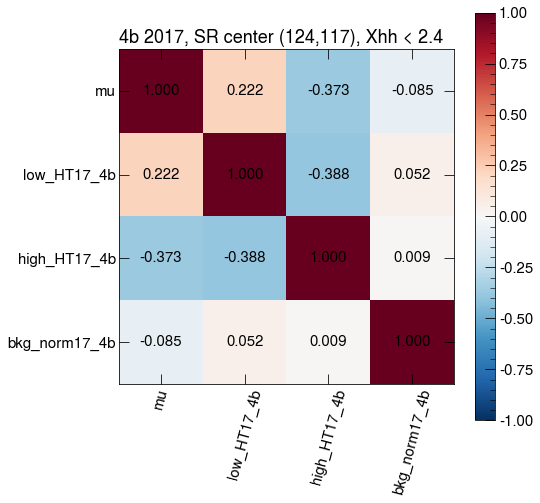

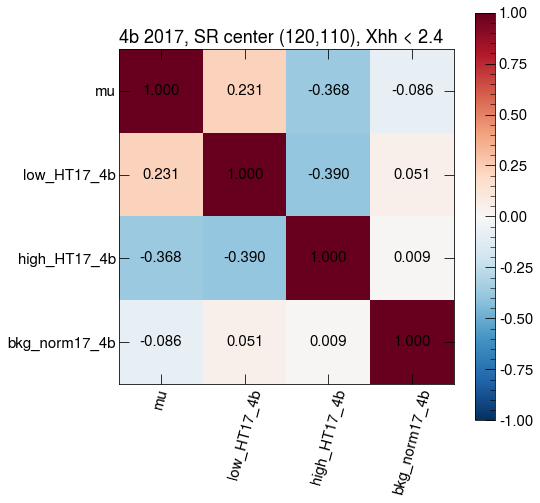

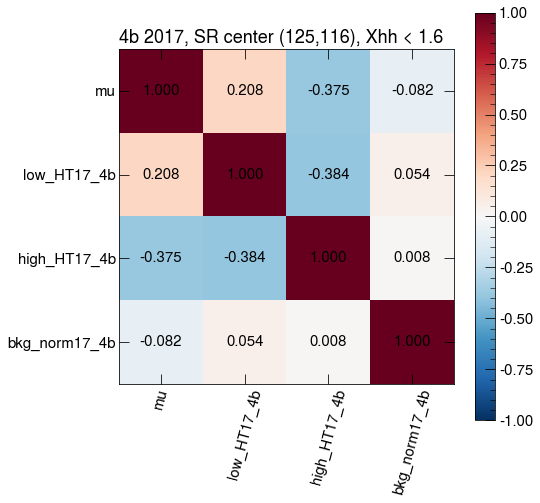

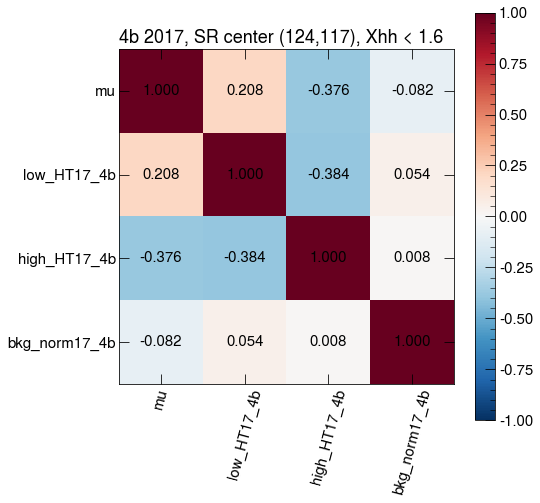

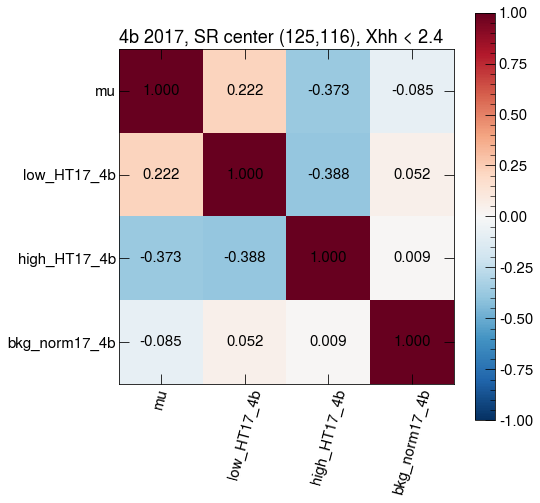

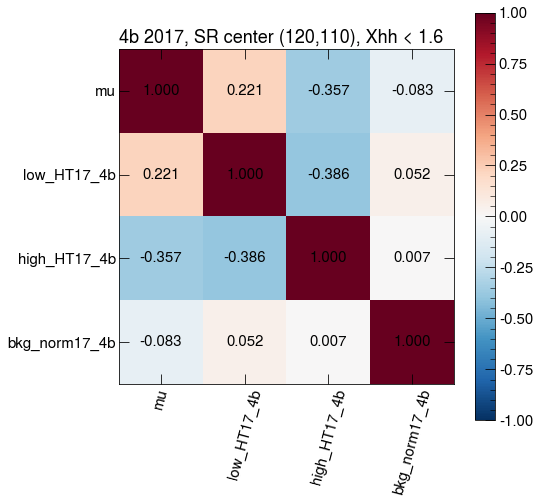

In [138]:
for corr_file in glob(f'{out_dir}/ws-systs-HTcut-300-4b-17-SM-HH-sr-*_correlations.csv'):
    
    print(corr_file)
    plotCorrelation(corr_file,figDir)

Ok, nice. The shifted SR has a slightly *lower* correlation with the low HT systematic, but nothing really to write home about.

Ok, sweet, so it's not clear how we can do *optimally* w/o galvanizing our SR, but at least we know how to do *better* than what we have before.

**Next:** What would be the corresponding CR / VR with an $m_{h1}$ and $m_{h2}$ optimized for the SR?

In [4]:
sFile = uproot.open('../data/RR/NNT_DEC20_MDR_VEC/MC/600043_mc16d/NanoNTuple.root')
bFile = uproot.open('../data/RR/bkg_ests/test_Xwt_change/4b/MDR_VEC/data17_NN_100_bootstraps_IQR.root')

#bFile = uproot.open('../data/RR/bkg_ests/test_Xwt_change/4b/MDR_VEC/orig_files/data_MDR_VEC_17.root')

In [5]:
bcols = ['m_h1','m_h2','m_hh','ntag','kinematic_region']

In [4]:
for k in bFile.keys():
    print(k)

b'validation;1'
b'sig;1'
b'control;1'
b'NN_norm_bstrap_med_17;1'
b'NN_norm_bstrap_IQR_17;1'
b'NN_norm_bstrap_perc_25_17;1'
b'NN_norm_bstrap_perc_75_17;1'
b'NN_norm_VRderiv_bstrap_med_17;1'
b'NN_norm_VRderiv_bstrap_IQR_17;1'
b'NN_norm_VRderiv_bstrap_perc_25_17;1'
b'NN_norm_VRderiv_bstrap_perc_75_17;1'


In [37]:
# for k in bFile[t].keys():
#     if 'vbf' in k.decode():
#         print(k)

In [8]:
bdf = pd.concat([bFile[t].pandas.df(bcols) for t in ['sig','validation','control']],ignore_index=True)
bdf.head()

m_h1        m_h2        m_hh  ntag  kinematic_region
0  116.275002  126.115211  382.463898     2                 0
1  120.239769  125.153839  722.690613     2                 0
2  134.592194  110.788551  295.680450     2                 0
3  109.408531  117.246048  346.159119     2                 0
4  116.081490  101.700211  356.581085     2                 0

In [9]:
for t in ['sig','validation','control']:
    print(f'{t:10s}: ',bFile[t].numentries)

sig       :  341558
validation:  515279
control   :  949108


In [10]:
deltas, r_VRs = np.meshgrid(np.linspace(0,.05,11),np.linspace(15,45,7))

In [13]:
x1, y1 = 124,117

In [14]:
bdf[f'Xhh_{x1}_{y1}'] = getXhh(bdf.m_h1,bdf.m_h2, x1, y1)

In [15]:
np.sum(bdf.ntag==3)

16071

In [16]:
mask = (bdf.ntag==2) & (bdf[f'Xhh_{x1}_{y1}'] < 1.6)
x1_2b, y1_2b = bdf.loc[mask,['m_h1','m_h2']].mean().values

In [17]:
mu_2b_x1 = []
mu_2b_y1 = []

mu_3b_x1 = []
mu_3b_y1 = []

mu_4b_x1 = []
mu_4b_y1 = []

for delta, r_VR in tqdm(zip(deltas.flatten(), r_VRs.flatten())):

    VR = np.sqrt((bdf['m_h1'] - x1_2b * (1+delta))**2 + (bdf['m_h2'] - y1_2b * (1+delta))**2) < r_VR
    VR = VR & (bdf[f'Xhh_{x1}_{y1}'] > 1.6)

    mu_2b_x1.append(bdf.loc[VR & (bdf.ntag==2),'m_h1'].mean())
    mu_2b_y1.append(bdf.loc[VR & (bdf.ntag==2),'m_h2'].mean())
    
    mu_3b_x1.append(bdf.loc[VR & (bdf.ntag==3),'m_h1'].mean())
    mu_3b_y1.append(bdf.loc[VR & (bdf.ntag==3),'m_h2'].mean())
    
    mu_4b_x1.append(bdf.loc[VR & (bdf.ntag>=4),'m_h1'].mean())
    mu_4b_y1.append(bdf.loc[VR & (bdf.ntag>=4),'m_h2'].mean())
    
    

77it [00:03, 21.83it/s]


In [23]:
np.array(mu_2b_y1).reshape(7,11)[-1]

array([114.69871521, 115.11235046, 115.52957153, 115.94546509,
       116.3653183 , 116.77825928, 117.18318176, 117.59972382,
       118.01573181, 118.43383026, 118.85951233])

[-4.645401   -3.62526703 -2.5896759  -1.52684021 -0.45314026  0.64146423
  1.74258423  2.87002563  4.01368713  5.1756897   6.36105347]
2b m_{h1} 4 -0.4531402587890625
[-1.81970215 -0.85087585  0.12736511  1.12690735  2.15592194  3.1988678
  4.27497101  5.36431122  6.48899841  7.6291275   8.79859161]
2b m_{h2} 2 0.1273651123046875
[-3.93758392 -2.50016785 -1.25166321  0.10322571  1.55415344  2.67095184
  3.7931366   4.9979248   6.05802917  7.09080505  7.98171997]
3b m_{h1} 3 0.1032257080078125
[ 1.82974243  3.33170319  4.56516266  5.86404419  7.38571167  8.67086029
  9.67108154 10.53186035 11.40983582 12.31672668 13.16575623]
3b m_{h2} 0 1.829742431640625
[-4.07096863 -2.73501587 -1.35301208  0.05092621  1.50550079  2.74417877
  3.97213745  5.03643799  5.95822144  6.97470093  7.73234558]
4b m_{h1} 3 0.05092620849609375
[ 1.35778809  2.50409698  3.86471558  5.16127777  6.76039886  8.12865448
  9.22140503 10.30195618 11.26919556 12.08590698 12.81687927]
4b m_{h2} 0 1.3577880859375


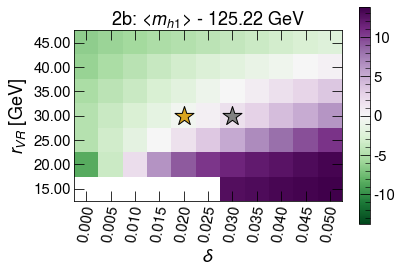

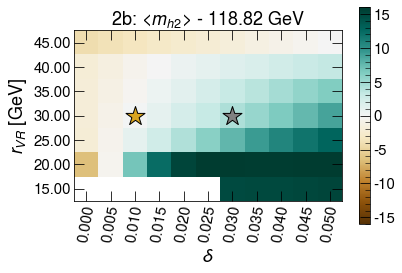

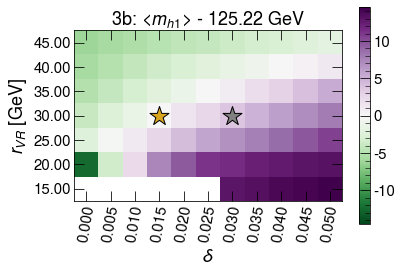

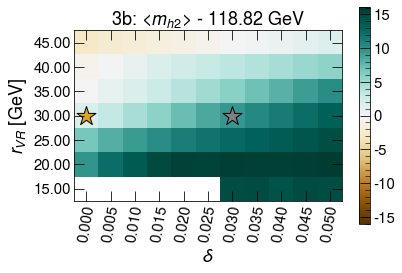

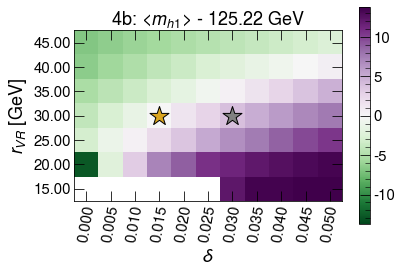

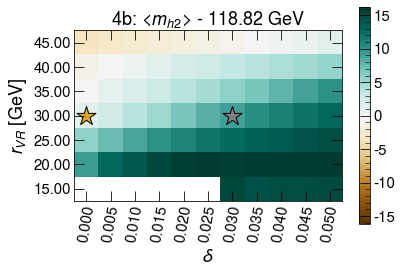

In [45]:
for mu_x1,mu_y1, ntag in zip([mu_2b_x1, mu_3b_x1, mu_4b_x1],
                             [mu_2b_y1, mu_3b_y1, mu_4b_y1],
                             [2,3,4]):

    for mus, cmap, mean, var in zip([mu_x1,mu_y1],['PRGn_r','BrBG'],[x1_2b,y1_2b],['$m_{h1}$','$m_{h2}$']):

        z = np.array(mus).reshape(7,11) - mean

        v = np.max(np.abs(np.nan_to_num(z)))

        plt.figure()
        plt.imshow(z, cmap=cmap, vmin=-v, vmax=v, origin='lower')
        plt.colorbar()

        plt.xticks(range(11),[f'{d:.3f}' for d in deltas[0]],rotation=80)
        plt.yticks(range(7),[f'{r:.2f}' for r in r_VRs[:,0]])

        ax = plt.gca()
        ax.tick_params(which='minor', length=0)

        plt.xlabel('$\delta$',fontsize=18)
        plt.ylabel('$r_{VR}$ [GeV]', fontsize=18)

        plt.title(f'{ntag}b: <{var}> - {mean:.2f} GeV')

        # Put a star on the plot
        plt.scatter([6],[3],400,color='grey',marker='*',edgecolors='k')

        # And *also* put a gold star on the plot for where the optimal point w/ r_VR = 30 GeV
        j = np.argmin(np.abs(np.where(np.nan_to_num(z[3])==0,np.inf,z[3])))
        print(z[3])
        plt.scatter([j],[3],400,color='goldenrod',marker='*',edgecolors='k')

        print(f'{ntag}b',var[1:-1],j,z[3,j])
    #break

Aweseome, it *seems* like there is a fairly stable proposal for the new VR from these studies, that I can at least trust for 2b, although the 3b and 4b ones should be taken w/ a *gain of salt* b/c these Ntuples blinded the *old* SR.

In [53]:
r_VR = 30
#delta = 0.015

delta1 = 0.02
delta2 = 0.01

In [54]:
bdf['kr_new'] = 2
bdf.loc[bdf[f'Xhh_{x1}_{y1}'] < 1.6,'kr_new'] = 0

#VR = np.sqrt((bdf['m_h1'] - x1_2b * (1+delta))**2 + (bdf['m_h2'] - y1_2b * (1+delta))**2) < r_VR
VR = np.sqrt((bdf['m_h1'] - x1_2b * (1+delta1))**2 + (bdf['m_h2'] - y1_2b * (1+delta2))**2) < r_VR
bdf.loc[VR & (bdf[f'Xhh_{x1}_{y1}'] > 1.6),'kr_new'] = 1

In [48]:
np.sum(VR)

801562

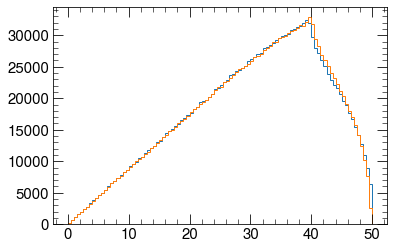

In [55]:
plt.hist(np.sqrt((bdf.loc[bdf.ntag==2,'m_h1'] - x1_2b * (1+delta))**2 + (bdf.loc[bdf.ntag==2,'m_h2'] - y1_2b * (1+delta))**2),
         100,(0,50),histtype='step')
plt.hist(np.sqrt((bdf.loc[bdf.ntag==2,'m_h1'] - x1_2b * (1+delta1))**2 + (bdf.loc[bdf.ntag==2,'m_h2'] - y1_2b * (1+delta2))**2),
         100,(0,50),histtype='step')



plt.ylim()
plt.plot([30]*2,ylim,'k--')
plt.ylim(
)
plt.show()

Why the wierd shape??

Fricking `X_wt` lol

In [50]:
np.sum(bdf.kinematic_region==1)

515279

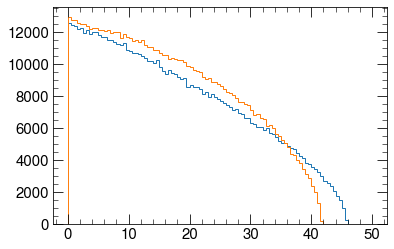

In [51]:
plt.hist((bdf.loc[bdf.ntag==2,'m_h1'] - x1_2b),100,(0,50),histtype='step')
plt.hist((bdf.loc[bdf.ntag==2,'m_h2'] - y1_2b),100,(0,50),histtype='step')
plt.show()

In [33]:
# plt.hist(np.sqrt((bdf.loc[bdf.ntag==2,'m_h1'] - x1)**2 + (bdf.loc[bdf.ntag==2,'m_h2'] - y1)**2),100,(0,50))

# ylim = plt.ylim()
# plt.plot([30]*2, ylim, 'k--')
# plt.ylim(ylim)

# plt.show()

124.78938
117.02816
126.72424
116.41849
118.931595
110.01524
122.84778
109.72186


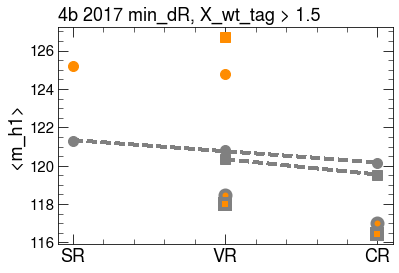

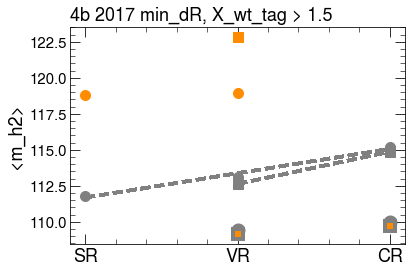

In [58]:
for c in ['m_h1','m_h2']:

    plt.figure()
      
    for ntag,mask,marker in zip([2,4],[bdf.ntag==2,bdf.ntag>=4],['o','s']):

        # Old analysis regions
        vs = []
        for i in range(3):
            
            mu = np.mean(bdf.loc[mask & (bdf.kinematic_region == i),c])
            plt.plot([i],[mu],marker=marker,color='grey',markersize=10)

            if i>0 or ntag == 2: vs.append(mu)
        
        # Maybe draw the best fit lines?
        if ntag == 2:
            xx = np.arange(3)
            m,b = np.polyfit(xx,np.array(vs),1)
            
            plt.plot(xx,xx*m+b,'grey',ls='--')
        else:
            plt.plot(range(1,3),vs,'grey',ls='--')
     
    
    # Next: Overlay the newly opt points 
    for ntag,mask,marker in zip([2,4],[bdf.ntag==2,bdf.ntag>=4],['o','s']):

        # New SR
        if ntag ==2:
            mu = np.mean(bdf.loc[mask & (bdf.kr_new==0),c])
            plt.plot([0],[mu],marker=marker,color='darkorange',markersize=10)
          
        # Old VR new SR
        mu = np.mean(bdf.loc[mask & (bdf[f'Xhh_{x1}_{y1}'] > 1.6) & (bdf.kinematic_region==1),c])
        plt.plot([1],[mu],marker=marker,color='darkorange',markeredgecolor='grey',
                 markeredgewidth=4,markersize=10)
        
        # New VR
        mu = np.mean(bdf.loc[mask & (bdf.kr_new==1),c])
        print(mu)
        plt.plot([1],[mu],marker=marker,color='darkorange',markersize=10)

        # Old CR new VR
        mu = np.mean(bdf.loc[mask & (bdf.kr_new==2),c])
        print(mu)
        plt.plot([2],[mu],marker=marker,color='darkorange',markeredgecolor='grey',
                 markeredgewidth=4,markersize=10) 
            
    #ax = plt.gca()
    plt.xticks(range(3),['SR','VR','CR'],fontsize=18)
    plt.ylabel(f'<{c}>',fontsize=18)
    plt.title('4b 2017 min_dR, X_wt_tag > 1.5',loc='left')

Ok - so this is *sub-optimal* at this stage lol.

I think what I need to do is just *fix* th r_VR and scan more finely over delta (maybe allowing $\delta$ to be negative??)


**Midplay summary thoughts:**
1. I think an offset b/w the lines for 2b and 4b is ok, b/c this will be taken into account w/ an overall normalization
2. What we *don't* want is a slope lol, b/c this is directly translating into our background systematic.

### Try 2 @ VR opt!!

In [35]:
r_VR = 30

ds = np.linspace(-.05,.05)

There's a slope... with the baseline that I'm trying to rectify rn.

In [36]:
# for s,c0,c1 in zip(['pre','post'],['dodgerblue','deeppink'],['limegreen','blueviolet']):

#     for k in ks:

#         plt.figure()
#         plt.plot(kr,jpt[f'{k}_2b_pre'],color=c0,label='scalar 2b')
#         plt.plot(kr,vec[f'{k}_2b_pre'],color=c1,label='vector 2b')


#         plt.plot(kr[1:],jpt[f'{k}_3b_pre'],color=c0,ls='dotted',label='scalar 3b')
#         plt.plot(kr[1:],vec[f'{k}_3b_pre'],color=c1,ls='dotted',label='vector 3b')

#         plt.plot(kr[1:],jpt[f'{k}_4b_pre'],color=c0,ls='--',label='scalar 4b')
#         plt.plot(kr[1:],vec[f'{k}_4b_pre'],color=c1,ls='--',label='vector 3b')

#         plt.xlabel('analysis region')
#         plt.ylabel(f'<{k}>')
#         plt.legend(bbox_to_anchor=(1,1.03))
#         plt.title(f'min dR region opt, post X_wt')
        
# #         plt.savefig(f'figures/data17-JUN20-5jets/preLN_lr_0p003/systs-diagnostics/avg_{k}_{s}-X_wt.pdf',
# #                     bbox_to_anchor='tight')